In [8]:
%load_ext watermark
%watermark --python --datename --machine

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.25.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.0-1034-oem
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [9]:
%matplotlib inline
import os

import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import math

import isupgrader.data.tiler.v3

%watermark --iversion

pandas    : 1.3.0
matplotlib: 3.4.2
numpy     : 1.18.0
tifffile  : 2021.7.2



In [10]:
IMG_ID = "008308f099f0c565fbc024ece6b8b08c"

# Tiling
TILE_SIZE=256
LEVEL=1
N_TILES=16

In [11]:
TRAIN_IMAGES = "/data/raw/panda/train_images/"
df = pd.read_csv("/data/raw/panda/train.csv")

# Change negative gleason_score to 0+0
df["gleason_score"] = df["gleason_score"].apply(lambda x: "0+0" if x=="negative" else x)

In [12]:
def plot_tiles(tiles):
    grid_size = math.ceil(len(tiles)**0.5)

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(16,16))
    axs = axs.flatten()

    for ax in axs:
        ax.axis("off")
        
    for tile, ax in zip(tiles, axs):
        ax.axis("on")
        ax.tick_params(which="both",bottom=False,left=False,labelbottom=False,labelleft=False)
        ax.imshow(tile, aspect="auto")

    fig.subplots_adjust(hspace=0, wspace=0)
    
    plt.show()

In [13]:
%%time

tiff_file = os.path.join(TRAIN_IMAGES, f'{IMG_ID}.tiff')
image = tifffile.imread(tiff_file, key=LEVEL)
tiles = isupgrader.data.tiler.v3.generate_tiles(image, TILE_SIZE, min_tissue=0.3)

print(len(tiles))

16
CPU times: user 454 ms, sys: 68.2 ms, total: 522 ms
Wall time: 266 ms


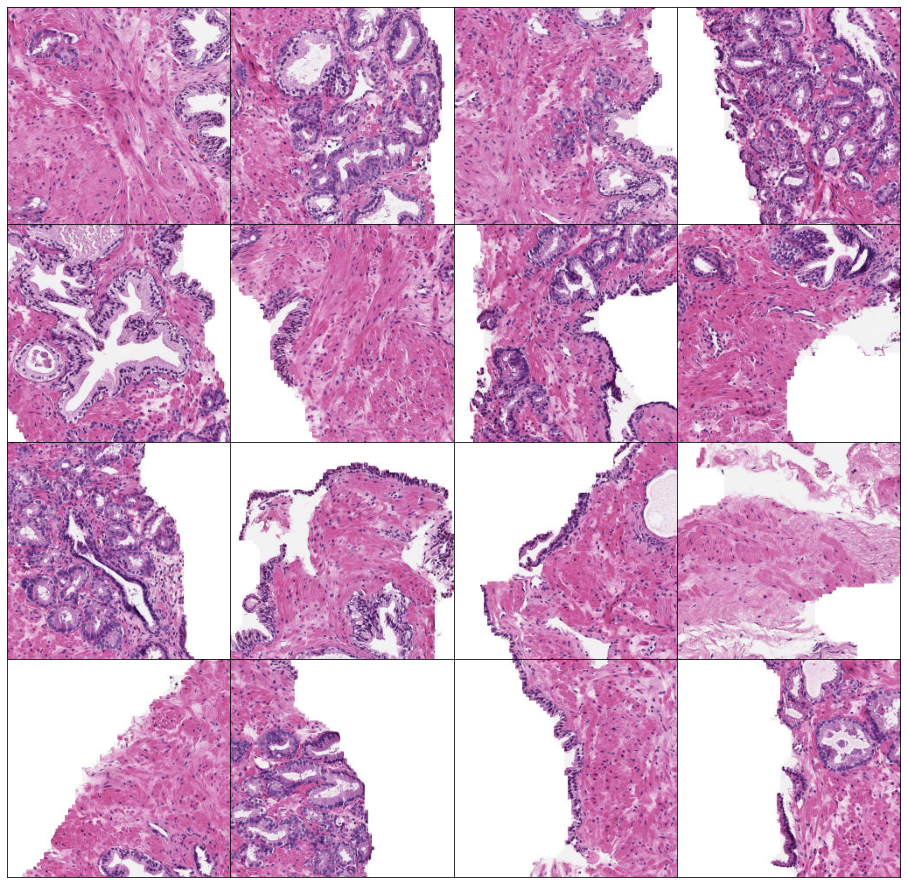

In [14]:
plot_tiles(tiles)